In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)

In [2]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

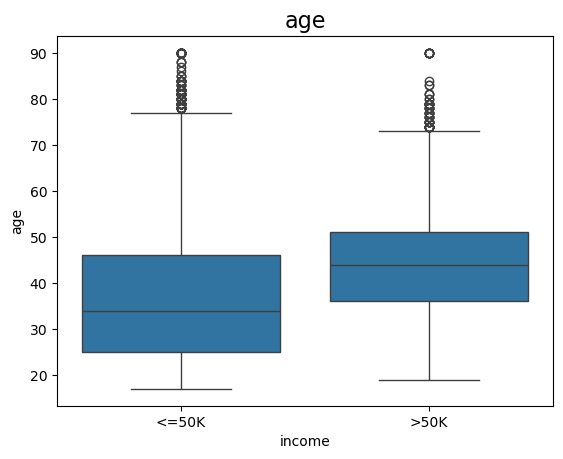

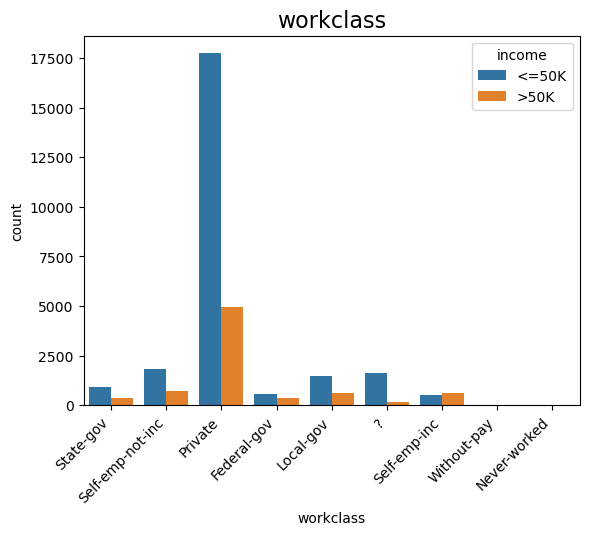

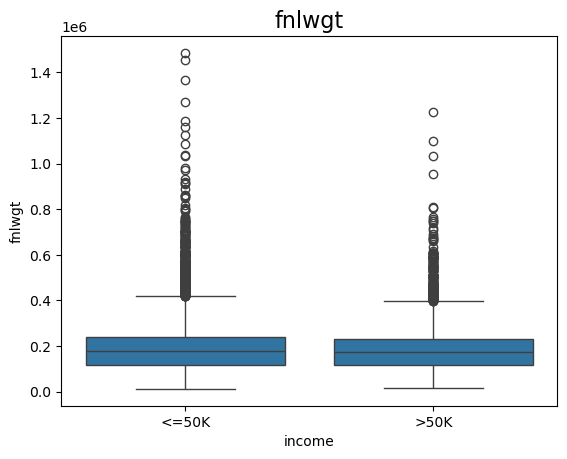

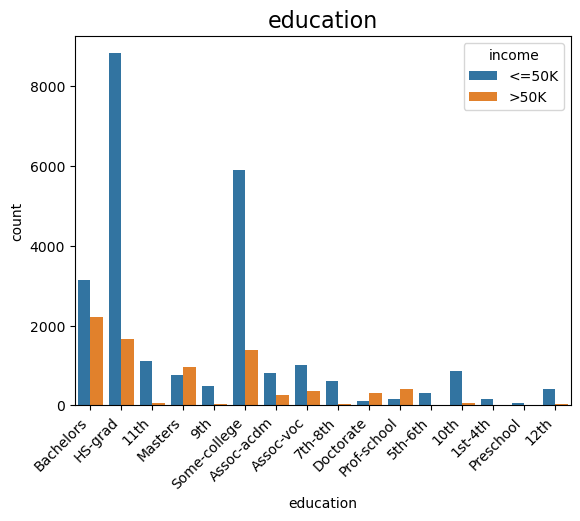

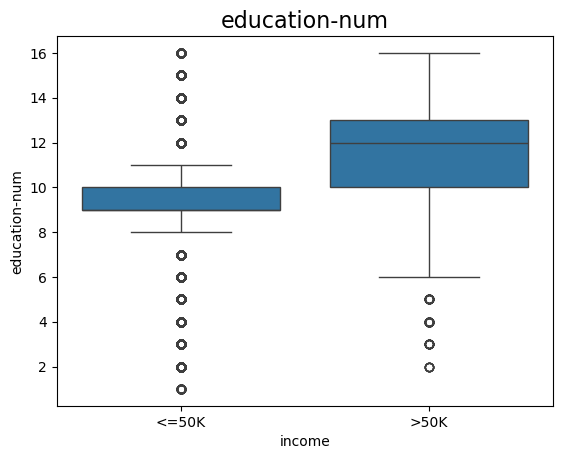

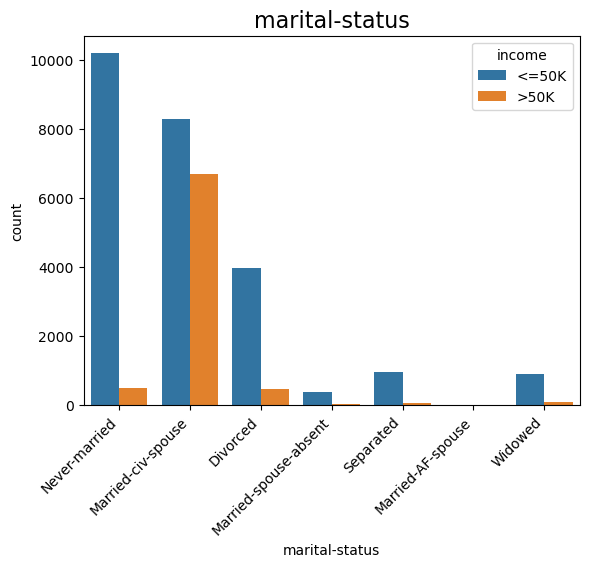

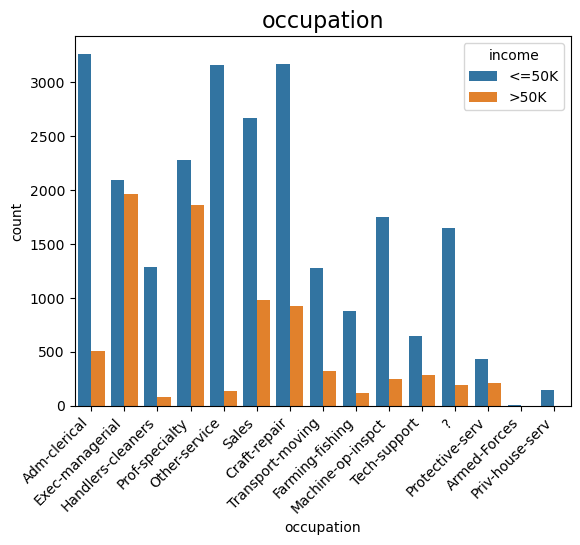

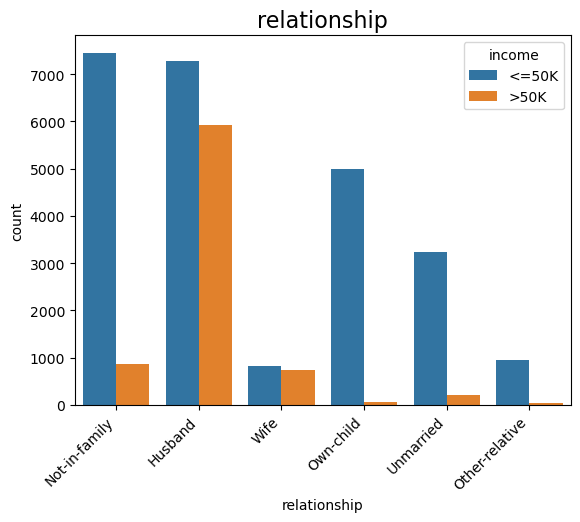

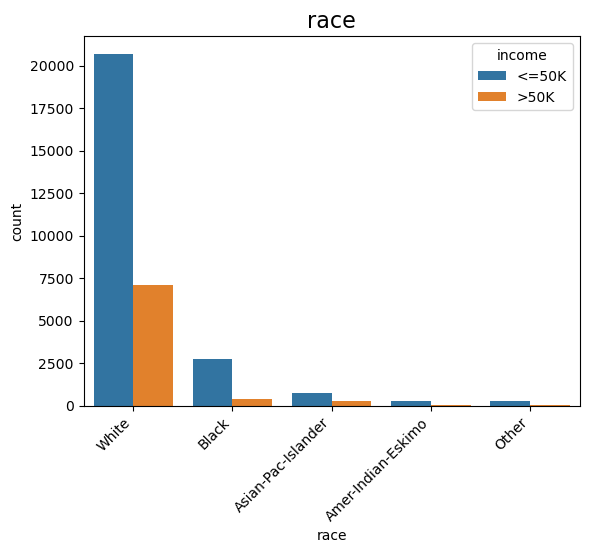

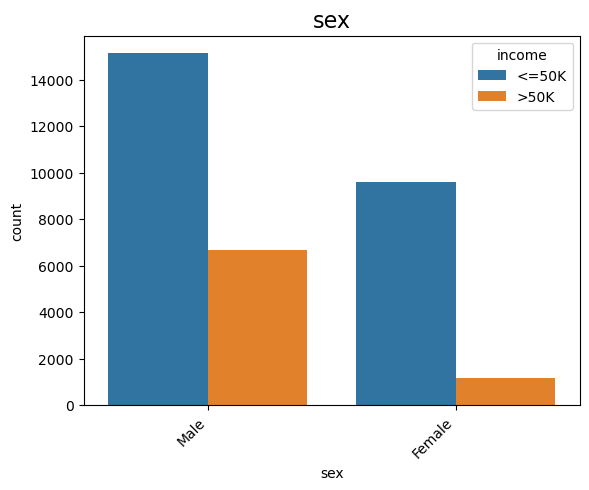

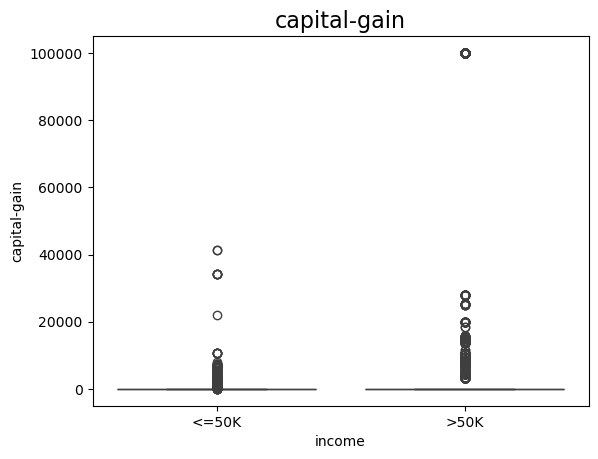

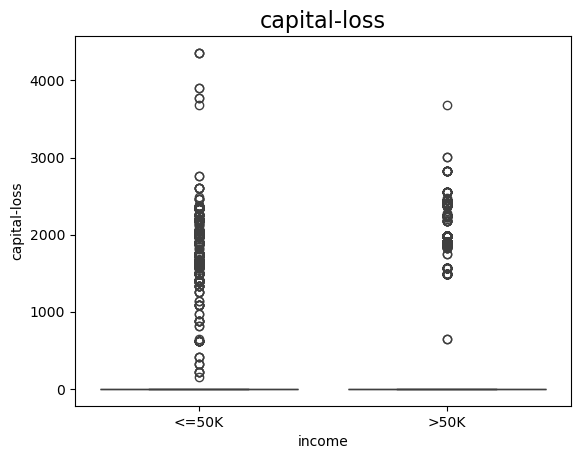

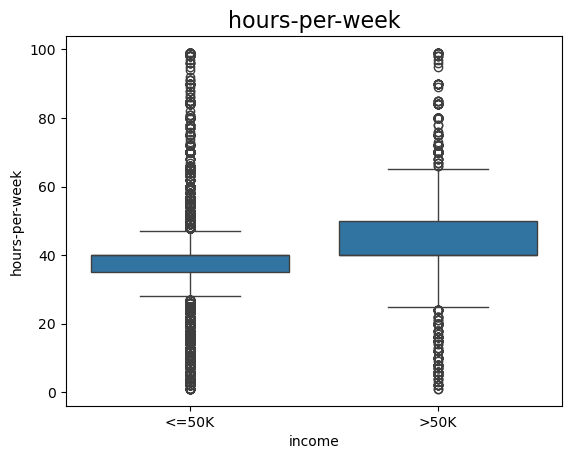

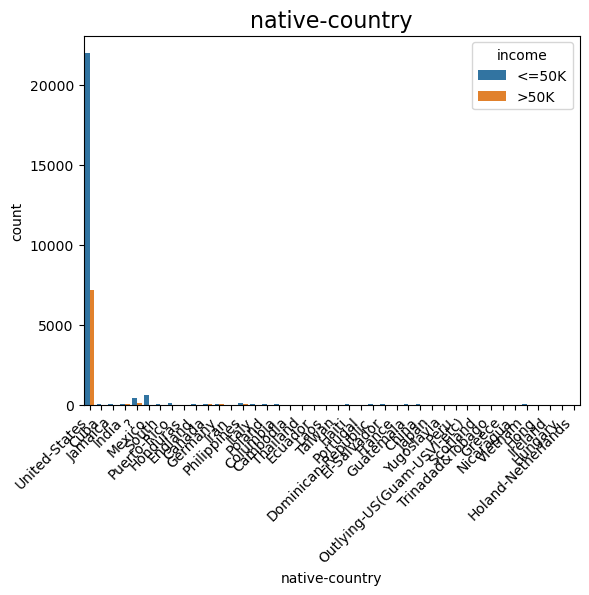

In [5]:
for col in df.columns:
    if col != 'income': 
        if df[col].dtype == 'object':
            sns.countplot(x=df[col], hue=df['income'],  data=df)
            plt.title(col, fontsize=16)
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:
            sns.boxplot (x=df['income'],y=df[col] ,  data=df)
            plt.title(col, fontsize=16)
            plt.show()

In [6]:
feature_cols=['age','education','education-num','marital-status','relationship','race','sex','capital-gain', 'capital-loss','hours-per-week']
X = pd.get_dummies(df[feature_cols], drop_first=True)

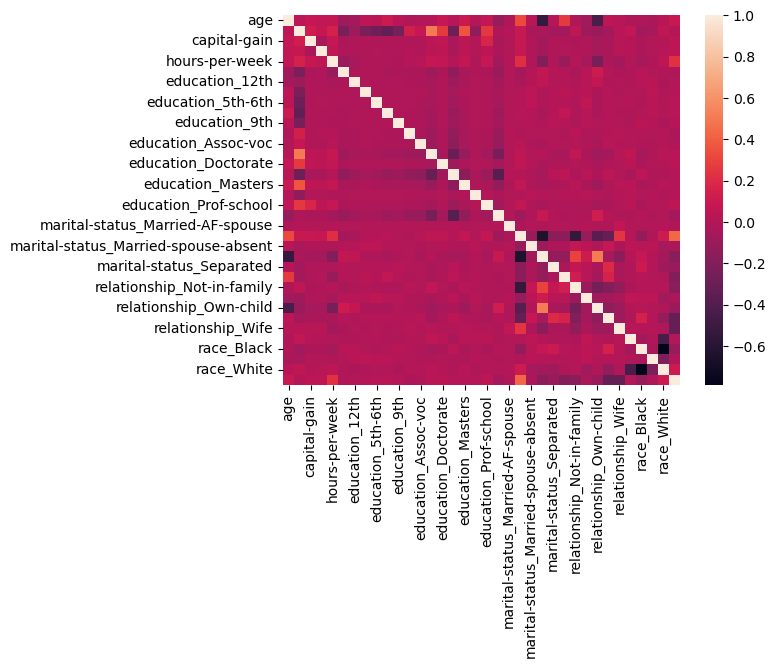

In [9]:
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()
plt.close()

In [11]:
y = np.where(df.income=='<=50K', 0, 1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [15]:
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercept:
-8.04924542983761
Model Parameters, Coeff:
[[ 1.92840218e-02  3.11760387e-01  3.07556656e-04  6.38397603e-04
   2.87331265e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.37289523e-01
  -2.14001996e-02  3.78383860e-02  0.00000000e+00 -1.47111623e-01
   5.08168732e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.65906396e+00  0.00000000e+00 -5.40206952e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.80210239e-01
  -9.44646762e-01 -1.15535780e-01  8.92696852e-01  0.00000000e+00
  -7.65686372e-02  0.00000000e+00  7.48227370e-02  5.34241027e-01]]


In [17]:
print(confusion_matrix(y_test, y_pred))

[[4652  374]
 [ 642  845]]


In [19]:
print('score:')
print(log_reg.score(x_test, y_test))

score:
0.8440042990941194


In [23]:
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
print(coef_df)

                                  var      coef
28             relationship_Own-child -0.944647
23       marital-status_Never-married -0.540207
27        relationship_Other-relative -0.180210
15                  education_HS-grad -0.147112
11               education_Assoc-acdm -0.137290
29             relationship_Unmarried -0.115536
32                         race_Black -0.076569
12                education_Assoc-voc -0.021400
2                        capital-gain  0.000308
3                        capital-loss  0.000638
0                                 age  0.019284
4                      hours-per-week  0.028733
13                education_Bachelors  0.037838
16                  education_Masters  0.050817
34                         race_White  0.074823
1                       education-num  0.311760
35                           sex_Male  0.534241
30                  relationship_Wife  0.892697
21  marital-status_Married-civ-spouse  1.659064


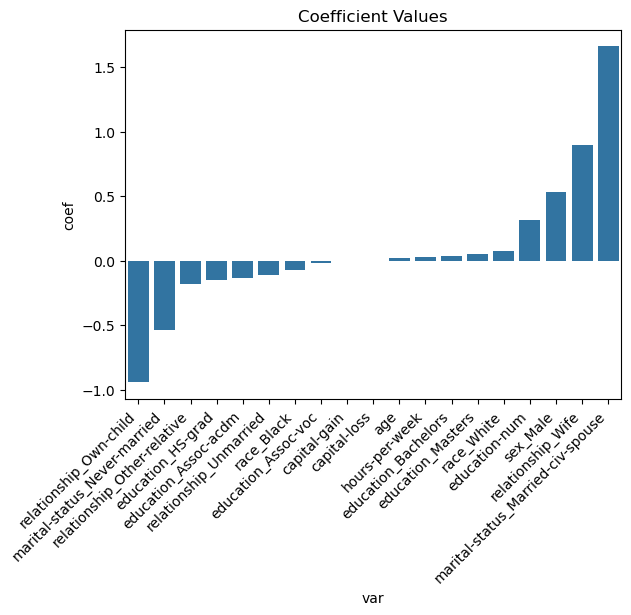

In [29]:
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=45, ha='right')
plt.title('Coefficient Values')
plt.show()
plt.close()

In [31]:
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print('ROC AUC score:')
print({roc_auc})

ROC AUC score:
{0.8940928824450449}


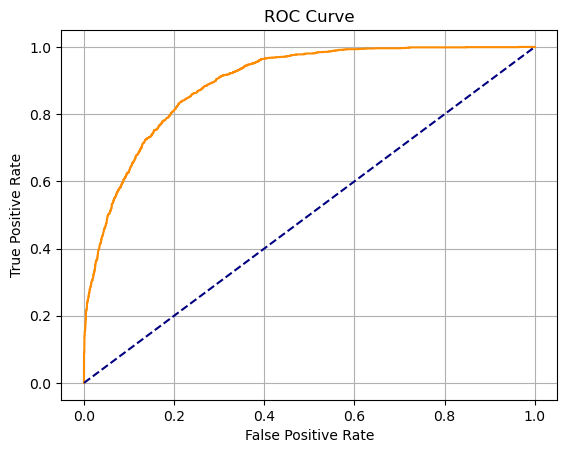

In [37]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()
